<br>
<p style="text-align: left;"><img src='https://s3.amazonaws.com/weclouddata/images/logos/sunlife_logo.png' width='35%'></p>
<p style="text-align:left;"><font size='10'><b> Machine Learning - Bagging Trees Demo</b></font> </p><font color='#559E54' size=6>Instructor Copy</font> </p>
<h2 align='left' > Sunlife Data Science Training </h2>

<h4 align='left'>  Prepared by: <img src='https://s3.amazonaws.com/weclouddata/images/logos/wcd_logo.png' width='15%'>

---

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split


/usr/lib64/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib64/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


### Create Simulated Data

In [2]:
# simulated 20 sin waves
np.random.seed(3)

X = np.zeros([20, 100])
Y = np.zeros([20, 100])
for i in range(20):
    X[i,:] = np.sort(np.random.uniform(2, 10, 100))
    Y[i,:] = np.sin(X[i,:]) + np.random.normal(0, 0.2, 100)

In [3]:
# some basic setups
def boostrap_sample(X, Y):
    '''Generate a boostrap sample of the original data.'''
    bsample = np.random.choice(range(len(Y)), len(Y), replace=True)
    bs_X = X[bsample]
    bs_Y = Y[bsample]
    return bs_X, bs_Y



In [4]:
def model_pred(x, y, model):
    '''Fit model and generate predictions.'''
    reg = model
    reg.fit(x, y)
    return reg.predict(x)

def bagg_model_pred(x, y, model, niter=50):
    '''Fit bagging model with 50 iterations and generate predictions.'''
    for i in range(niter):
        bs_x, bs_y = boostrap_sample(x, y)
        bs_order = np.argsort(bs_x, axis=0)[:,0]
        pred = model_pred(bs_x[bs_order], bs_y[bs_order], model)
        if i != 0:
            pred_agg = np.vstack([pred_agg, pred])
        else:
            pred_agg = pred
    return np.mean(pred_agg, 0)

### Fitting decision trees and bagged trees

In [5]:
# build models for each sin wave and make predictions
tree_pred = []
mars_pred = []
bagg_tree_pred = []
bagg_mars_pred = []

for i in range(20):
    x = X[i,:][:,np.newaxis]
    y = Y[i,:]
    
    tree_pred.append(model_pred(x, y, DecisionTreeRegressor(max_depth=3)))
    bagg_tree_pred.append(bagg_model_pred(x, y, DecisionTreeRegressor(max_depth=3), 50))


### Plotting

(-1.5, 1.5)

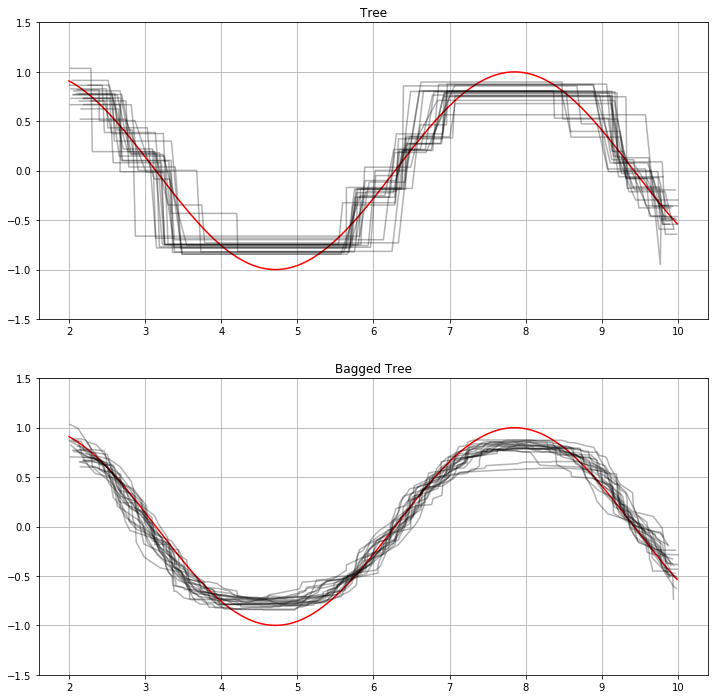

In [10]:
fig, axarr = plt.subplots(2, 1, figsize=(12,12))

x_test = np.arange(2.0, 10.0, 0.01)

# tree
axarr[0].plot(x_test, np.sin(x_test), 'r')
for i in range(20):
    axarr[0].plot(X[i,:], tree_pred[i], 'black', alpha=0.3)
axarr[0].set_title('Tree')
axarr[0].set_ylim([-1.5, 1.5])
    
# bagged tree
axarr[1].plot(x_test, np.sin(x_test), 'r')
for i in range(20):
    axarr[1].plot(X[i,:], bagg_tree_pred[i], 'black', alpha=0.3)
axarr[1].set_title('Bagged Tree')
axarr[1].set_ylim([-1.5, 1.5])

